# Auto-graded section

The block below imports the necessary packages for this assignment.

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import sklearn

## 0. The Dow Dataset (2.5 pts)

From now on, you will work with a new dataset, which is the Dow dataset. Read in the `impurity_dataset-training.xlsx` as a `pandas.DataFrame` with a variable name `df`. (2.5 pts)

Note: If you run this on a computer without Microsoft Excel you may get an error. However, it should work reliably in the Vocareum environment.

In [2]:
########################################
# Start your code here
df = pd.read_excel('impurity_dataset-training.xlsx')
########################################

In [3]:
assert type(df) == pd.core.frame.DataFrame
assert df.shape == (10703, 46)
assert np.isclose(np.linalg.norm(df[df.columns[1:]].loc[1]), 3381.2181210675867)

The cell below will clean the `df` to remove invalid cells and missing values. This cell create two variables `X` and `y` that will be the input feature matrix and corresponding impurity concentrations, respectively. You don't need to understand how this works yet, but we will cover it in future lessons.

In [4]:
def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis=1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype='float') #drop the last 5 cols that are not inputs
y = np.array(all_data[real_rows,-3], dtype='float')
y = y.reshape(-1,1)

## 1. Feature Scaling (37.5 pts)

In this problem, you will see how feature scaling will affect the model performance. First, import `StandardScaler` and `MinMaxScaler` from `scikit-learn`. Declare a `StandardScaler` object `ss` and a `MinMaxScaler` object `mms`. Do not change any default parameter settings for both scaler objects. (7.5 pts)

In [5]:
########################################
# Start your code here
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
mms = MinMaxScaler()
########################################

In [6]:
assert type(ss) == sklearn.preprocessing.StandardScaler
assert type(mms) == sklearn.preprocessing.MinMaxScaler

assert ss.with_mean and ss.with_std, "default setting for StandardScaler changed"
assert mms.feature_range == (0, 1), "default setting for MinMaxScaler changed"

Train a LASSO model with the Dow dataset and find the best scaling method (among no scaling, standard scaling, and min-max scaling). Below is the instruction step by step.

- Do train/test split on `X` and `y` by `train_test_split` with `test_size=0.3` and `random_state=42`. The training set and test set should be named as `*_train` and `*_test` where `*` denotes either `X` or `y`, respectively. (10 pts)
- Declare a LASSO model with `alpha=1e-4` and `tol=0.15`. Assign the LASSO model to the variable `lasso`. (5 points)
- For each scaling method, train the LASSO model on the training set and provide the $\mathrm{r^2}$ for the test set.
- Report the best $\mathrm{r^2}$ as `r2_opt`. (10 pts)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

########################################
# Start your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lasso = Lasso(alpha = 1e-4, tol = 0.15)

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)

train = [X_train, X_train_ss, X_train_mms]
test = [X_test, X_test_ss, X_test_mms]

r2_opt = 0
for tr, te in zip(train, test):
    lasso.fit(tr, y_train)
    if r2_opt < lasso.score(te, y_test):
        r2_opt = lasso.score(te, y_test)
########################################

In [8]:
assert X_train.shape == (7207, 40), "test_size not correct"

In [9]:
assert np.isclose(np.linalg.norm(X_test), 229401.15359462335), "random_state not correct"

In [10]:
assert type(lasso) == sklearn.linear_model.Lasso, "LASSO model not stored to correct variable"
assert lasso.alpha == 1e-4, "Alpha parameter of LASSO is not correct"
assert lasso.tol == 0.15, "Tolerance not correct"

In [11]:
assert np.isclose(r2_opt, 0.6805049793263493), "r2 not correct"

Report the resulting parameter vector after all features with a coefficient of zero have been dropped in the case of **min-max scaling**. The name of the reduced parameter vector should `dropped_coefs`. (5 pts)

In [12]:
########################################
# Start your code here
lasso.fit(X_train_mms, y_train)
coefs = lasso.coef_

dropped_coefs = coefs[coefs != 0]
########################################

In [13]:
assert np.isclose(np.linalg.norm(dropped_coefs) * len(dropped_coefs), 495.69726745190184), "parameter vector" 

## 2. Principal Component Analysis (10 pts)

Principal component analysis is closely related to the eigenvalue decomposition of the correlation matrix, as described in the lectures. This problem ensures that you know how to obtain the principal components in this way.

First, create a correlation matrix `corr` from `X`. (5 pts)

In [14]:
########################################
# Start your code here
corr = np.corrcoef(X.T)
########################################

In [15]:
assert np.isclose(np.linalg.norm(corr), 24.09288033850843)

Next, get the eigenvectors and corresponding eigenvalues for the correlation matrix. Report the third highest eigenvalue as `eigvec_3` and the eigenvector corresponding to the sixth highest eigenvalue as `eigvec_6`. (5 pts)

Hint: Remember that eigenvectors are stored as columns by default.

In [16]:
from scipy.linalg import eig

########################################
# Start your code here
eigvals, eigvecs = eig(corr)

eigvec_3 = eigvals[2]
eigvec_6 = eigvecs[:, 5]
########################################

In [17]:
assert np.isclose(np.real(eigvec_3), 2.33189496669), "Eigenvalue is not correct"
assert np.isclose(eigvec_6[0], 0.13732149628), "Eigenvector is not correct"
assert np.isclose(np.real(eigvec_3) * np.linalg.norm(eigvec_6[:10]), 0.8256564069966813), "Incorrect eigenvalue or eigenvector selected"

# Peer-graded section

## 1. Visualization

Read in `impurity_dataset-training.xlsx` again and clean the data using the code provided in the previous section and lecture notes. The result should be a matrix, `X` with all input data (all columns except for the last 5) and a vector, `y` with impurity values (third to last column). All values should be floating point numbers.

In [18]:
df = pd.read_excel('impurity_dataset-training.xlsx')

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis=1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype='float') #drop the last 5 cols that are not inputs
y = np.array(all_data[real_rows,-3], dtype='float')
y = y.reshape(-1,1)

When working with a high-dimensional data, visualizing the distribution of each feature helps understand the range and distribution of each feature. Plot the distributions of all 40 features as histograms. The code below sets up an 8x5 array of axes which you can use if you wish.

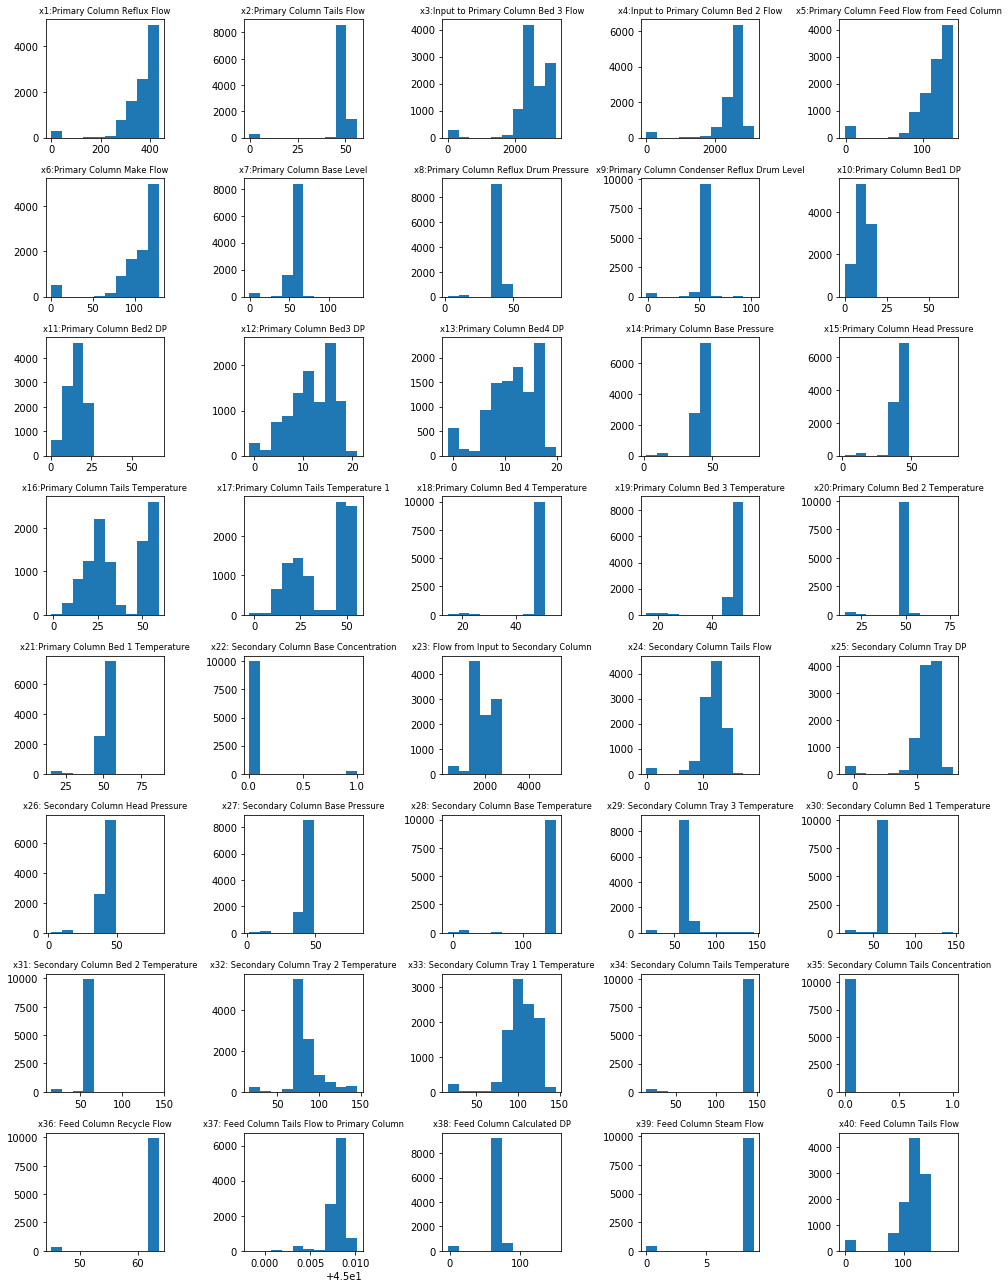

In [19]:
fig, axes = plt.subplots(8, 5, figsize=(14, 18))
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.hist(X[:, i])
    ax.set_title(df.columns[i + 1], fontsize = 'small')

plt.tight_layout()

You want to identify outliers for each feature. However, it can be difficult to detect outliers in the original scale. Re-plot the feature histograms with standard-scaled `X` matrix.

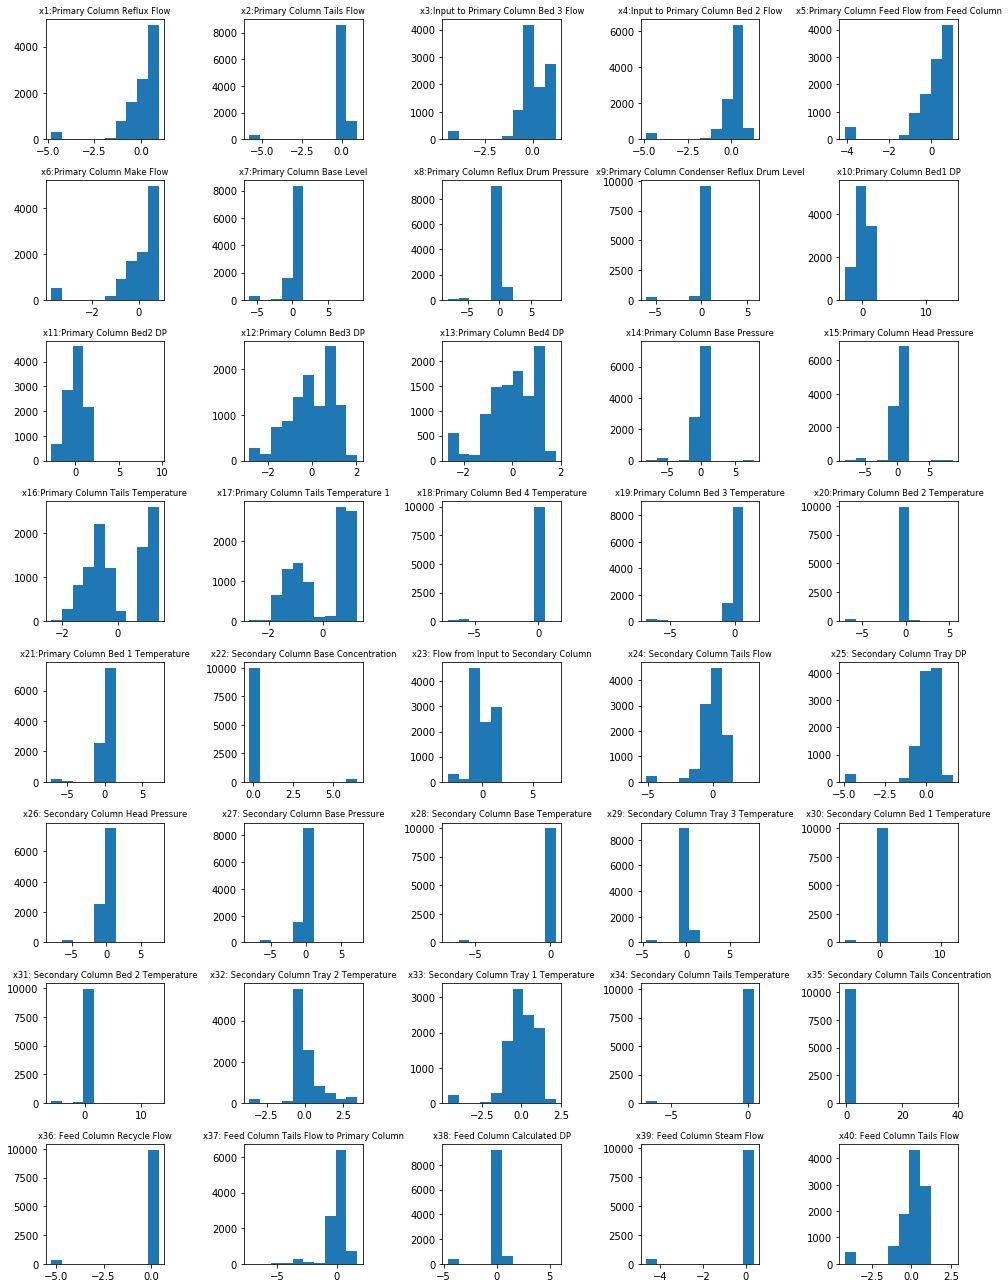

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

fig, axes = plt.subplots(8, 5, figsize=(14, 18))
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.hist(X_scaled[:, i])
    ax.set_title(df.columns[i + 1], fontsize = 'small')

plt.tight_layout()

List the name of features that have outliers based on the definition of outliers being data points that are more than 3$\sigma$ away from the mean. Briefly describe how you came to this conclusion based on the plots above (or another analysis).

#### Solution:

It is easy to find outliers when we plot histograms of standardized features where 1 on the x-axis corresponds to the standard deviation $\sigma$. Based on visual inspection, almost all of the features have outliers.

## 2. Principal Component Analysis

As we've learned from the lectures, PCA decomposes a dataset into directions based on maximizing the variance along each principal component vector. In this problem, you will see the relationship between variance and linear correlation with the target values.

Create a scatter plot of the data projected onto the first two principal component vectors. This can be done in two ways- linear algebra or the built-in scikit-learn PCA implementation. You may use either of these methods to achieve this. The number of points on the scatter plot should be equal to the number of rows in the matrix `X`.

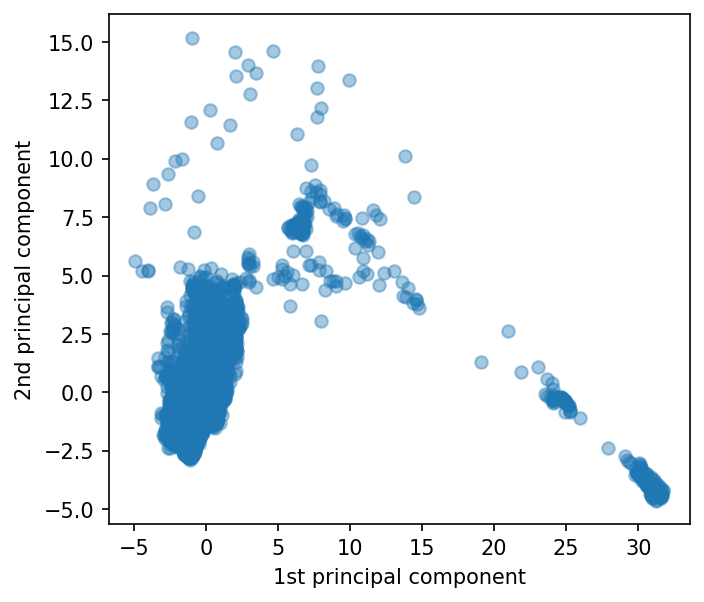

In [21]:
# Using eig function
# Using eig function
from scipy.linalg import eig

corr = np.corrcoef(X.T)
eigvals, eigvecs = eig(corr)
PC_projection = np.dot(X_scaled, eigvecs)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(PC_projection[:, 0], PC_projection[:, 1], alpha = .4)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component');

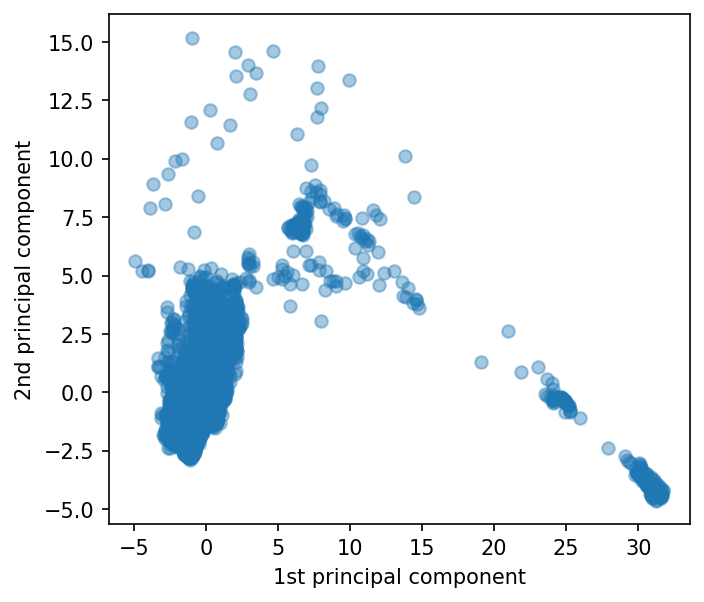

In [23]:
# Using built-in PCA function
# Using built-in PCA function
from sklearn.decomposition import PCA

pca = PCA()
PC_projection = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(PC_projection[:, 0], PC_projection[:, 1], alpha = .4)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component');

Create a scree plot where the x-axis is the number of the principal component and the y-axis the explained variance of each component (not cumulative). 

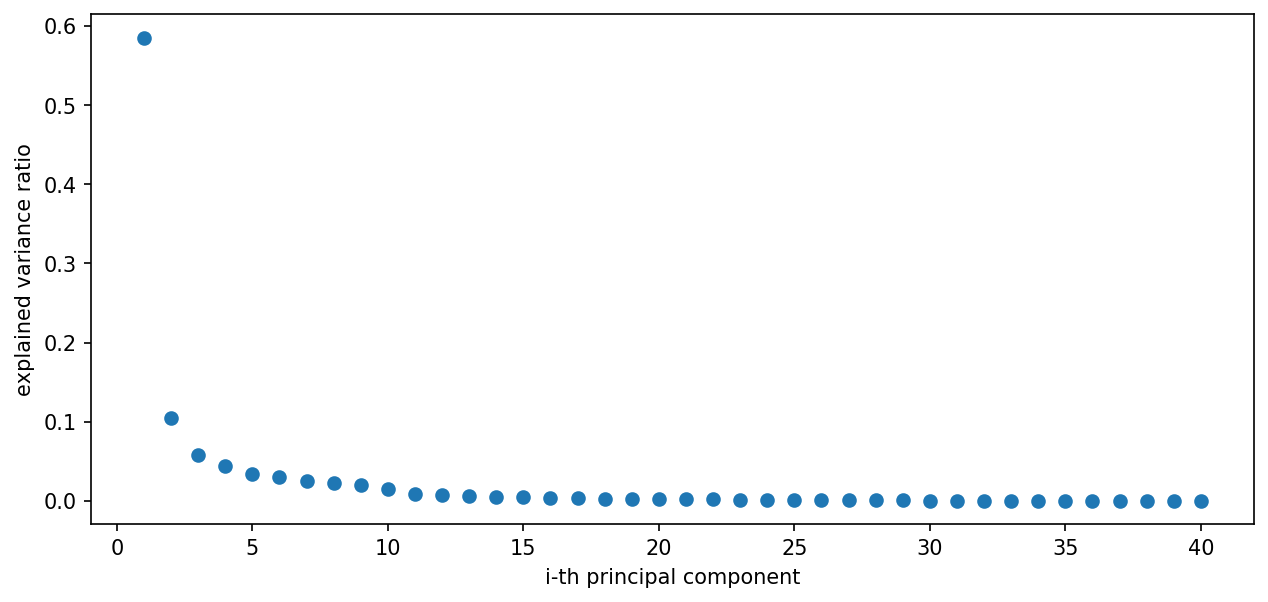

In [24]:
fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)

ax.plot(range(1, 41), pca.explained_variance_ratio_, 'o')
ax.set_xlabel('i-th principal component')
ax.set_ylabel('explained variance ratio');

In this problem, you will train a `LinearRegression` model to predict the `y` data with each of the principal components and see how the model performance changes for each of the principal components. Create a plot of **$\mathrm{r^2}$ vs. principal component vector number**.

- Declare a `LinearRegression(fit_intercept=True)` model and train it with the data projected onto the ***i***-th principal component where ***i*** ranges from 0 to 39. You do not need to perform a train/test split, since there is no risk of overfitting with only one fitted parameter and >10K data points.
- Obtain the $\mathrm{r^2}$ on the full dataset for each model and plot (`i`, `r2_i`).

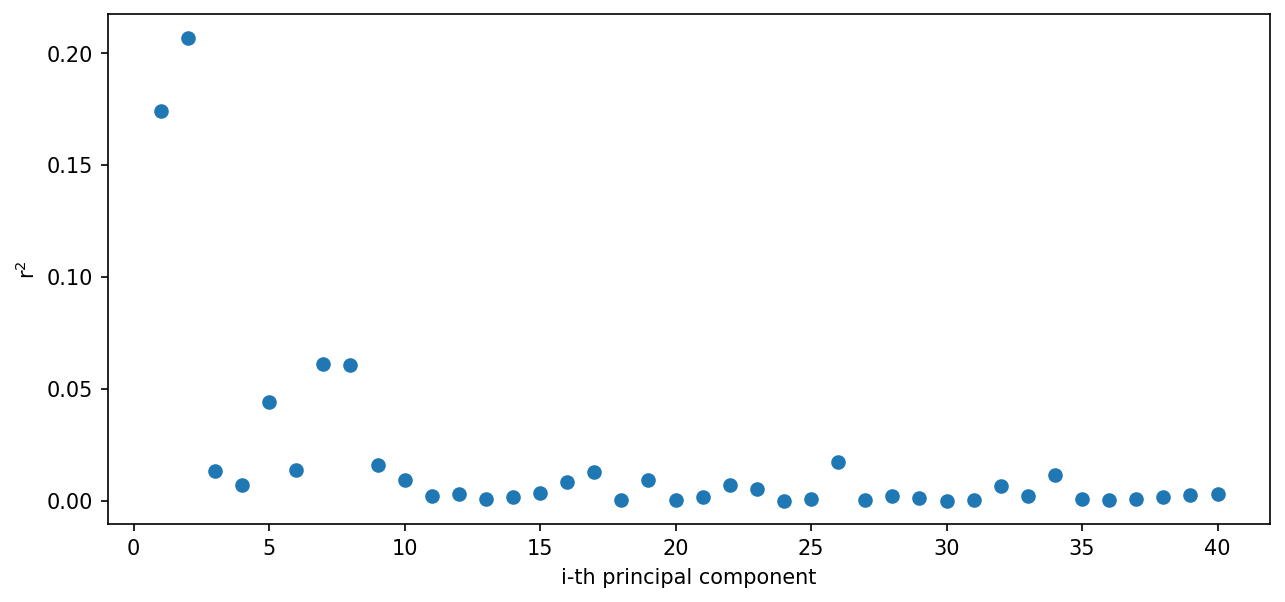

In [25]:
from sklearn.linear_model import LinearRegression

r2 = []

for i in range(PC_projection.shape[1]):
    lr = LinearRegression(fit_intercept = True)
    lr.fit(PC_projection[:, i].reshape(-1, 1), y)
    r2.append(lr.score(PC_projection[:, i].reshape(-1, 1), y))
    
fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)
ax.plot(range(1, 41), r2, 'o')
ax.set_xlabel('i-th principal component')
ax.set_ylabel('$\mathrm{r^2}$');

Compare the scree plot (variance explained by each component) to the r$^2$ plot (correlation between each component and the target data). Explain why the plots do not look the same. 

**Solution:** They are basically showing mathematically different things. The scree plot shows the variance of each principal component while the $\mathrm{r^2}$ shows the linear correlation between each component and the target values.

Create the best model you can using only three fitted parameters of a linear model (this could be three slopes, or two slopes and an intercept). You can use any strategy you like, including feature scaling, but any model with an r$^2$ score of at least 0.3 will be considered correct.

### Example

I will just choose the first 2 principal components since both of them gives $\mathrm{r^2}$ greater than 0.15 in which case I conjecture using both will result in $\mathrm{r^2}$ of 0.3.

In [26]:
lr = LinearRegression(fit_intercept = True)

# pick the first 2 PCs
first_2_PC = PC_projection[:, [0, 1]]

lr.fit(first_2_PC, y)

print('r2 = {}'.format(lr.score(first_2_PC, y)))

r2 = 0.38090368229443117


Briefly describe the strategy you used to create the model.